In [1]:
import torch
import os
from model import skyModel
from model import skyDataset
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import Dataset


In [2]:
model = skyModel()
model.load_state_dict(torch.load("skyModel.bin"))
model.eval()

skyModel(
  (conv1): Conv2d(3, 3, kernel_size=(5, 5), stride=(4, 4))
  (conv2): Conv2d(3, 3, kernel_size=(3, 3), stride=(2, 2))
  (relu): ReLU()
  (fc): Linear(in_features=675, out_features=1, bias=True)
)

In [3]:
def getRandomPictureFromPath(path):
    imgs = os.listdir(path)

    random_img = random.choice(imgs)
    random_img = os.path.join(path,random_img)
    img = cv2.imread(random_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.show()

    return img

In [14]:
test_data = os.path.join(".","dataset", "test_data.npm")
test_label = os.path.join(".","dataset", "test_label.npm")

test_dataset = skyDataset(2178, test_data, test_label)

n_samples = len(test_dataset)
random_index = int(np.random.random()*n_samples)
image, label = test_dataset[random_index]
#print(image)
print(image.size())
print(label)

y_pred = model(image)
y_pred = torch.round(y_pred)
print(y_pred, label)


torch.Size([3, 125, 125])
tensor(0.)
tensor([[0.]], grad_fn=<RoundBackward0>) tensor(0.)


In [5]:
#tests

mat = torch.ones((8,3,15,15))
print(mat.dim())
print(mat.size())
mat = mat.reshape((-1,675))
print(mat.size())


4
torch.Size([8, 3, 15, 15])
torch.Size([8, 675])


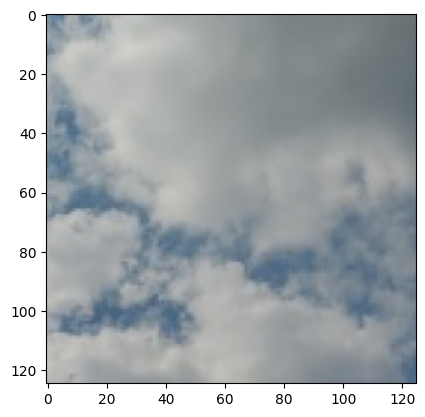

TypeError: conv2d() received an invalid combination of arguments - got (numpy.ndarray, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !Parameter!, !Parameter!, !tuple!, !tuple!, !tuple!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !Parameter!, !Parameter!, !tuple!, !tuple!, !tuple!, int)


In [6]:
#test
common_path = os.path.join(".","dataset","test")
test_data_source_0 = os.path.join(common_path, "0")
test_data_source_1 = os.path.join(common_path, "1")

img = getRandomPictureFromPath(test_data_source_0)

model(img)
